# Time Series Analysis & Forecast Tag Along Codes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")

In [4]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
df.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

<AxesSubplot:>

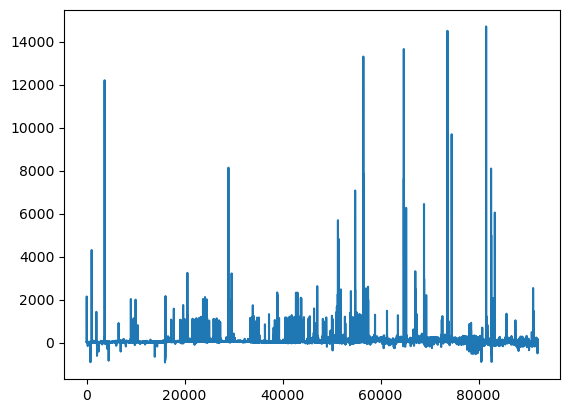

In [6]:
df.ElecPrice.plot()

In [7]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [9]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [10]:
df=df.rename(columns = {"FullDate": "ds", "ElecPrice": "y", "SysLoad": "add1", "Tmax":"add2", "GasPrice":"add3" })

In [11]:
df.tail()

,ds,add2,add1,add3,y
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000
92015,2021-02-28 23:00:00,24.3,714.69630,5.4848,62.955


In [12]:
df["ds"]=pd.to_datetime(df["ds"])
df.head()

,ds,add2,add1,add3,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


# QUESTION 11

Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

In [13]:
df.set_index("ds",inplace=True,drop=True)

In [14]:
dfd=df.resample("D").sum()

Text(0, 0.5, 'ElecPrice')

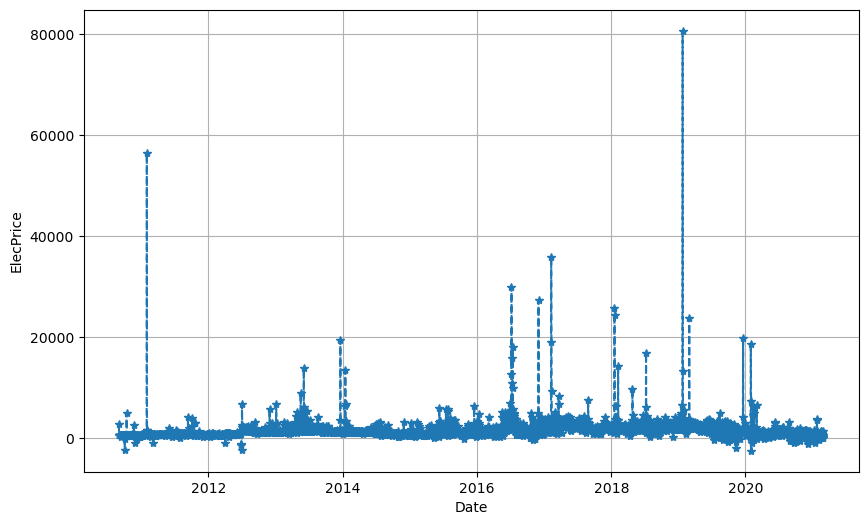

In [15]:
plt.figure(figsize=(10,6))
plt.plot(dfd.index, dfd.y, '--', marker='*', )
plt.grid()
plt.xlabel('Date')
plt.ylabel('ElecPrice')

# QUESTION 12

Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
#recall {"FullDate": "ds", "ElecPrice": "y", "SysLoad": "add1", "Tmax":"add2", "GasPrice":"add3" }
a=adfuller(dfd['add1'])
b=adfuller(dfd['add3'])
print(a)
print(b)
print('The p-value for SysLoad is:',np.round(a[1],decimals=6))
print('The p-value for GasPrice is:',np.round(b[1],decimals=6))

(-3.6901589888366484, 0.0042537255045740855, 30, 3803, {'1%': -3.432070672988693, '5%': -2.8623002987378547, '10%': -2.567174716967499}, 79103.01504886392)
(-2.90276669716518, 0.04502721288462542, 27, 3806, {'1%': -3.4320693157877544, '5%': -2.8622996992165364, '10%': -2.5671743978048323}, 32857.5394299048)
The p-value for SysLoad is: 0.004254
The p-value for GasPrice is: 0.045027


# QUESTION 13

Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [18]:
#recall {"FullDate": "ds", "ElecPrice": "y", "SysLoad": "add1", "Tmax":"add2", "GasPrice":"add3" }
c=adfuller(dfd['add3'])
d=adfuller(dfd['y'])
print(c)
print(d)
print('10% critical value for GasPrice:',np.round(c[4]['10%'],decimals=4))
print('5% critical value for ElecPrice:',np.round(c[4]['5%'],decimals=4))

(-2.90276669716518, 0.04502721288462542, 27, 3806, {'1%': -3.4320693157877544, '5%': -2.8622996992165364, '10%': -2.5671743978048323}, 32857.5394299048)
(-8.269053866873795, 4.848817773711827e-13, 20, 3813, {'1%': -3.432066157296446, '5%': -2.8622983040036005, '10%': -2.5671736550459663}, 69130.36360776308)
10% critical value for GasPrice: -2.5672
5% critical value for ElecPrice: -2.8623


# QUESTION 14

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

Hint:

Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it.

In [19]:
dfd.reset_index(inplace=True)

In [20]:
train=dfd.iloc[:2757]
test=dfd.iloc[2757:]
train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)

In [21]:
assert len(dfd)==(len(train)+len(test))
dfd.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [22]:
from prophet import Prophet
model=Prophet()
model.fit(train)
model.component_modes

14:08:06 - cmdstanpy - INFO - Chain [1] start processing
14:08:07 - cmdstanpy - INFO - Chain [1] done processing


{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [23]:
x_test=test.drop('y',axis=1)
y_test=test["y"]
future = model.make_future_dataframe(periods=1077, freq='D', include_history = False) 
forecast = model.predict(future) 
pred=forecast["yhat"]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,2533.794758,247.662962,4731.397623,2689.339501,2689.339501,2689.339501
1,2018-03-21,2687.146950,276.729652,5110.874790,2690.146479,2690.146479,2690.146479
2,2018-03-22,2786.174266,447.845730,5145.662955,2690.953457,2690.953457,2690.953457
3,2018-03-23,2578.334376,211.240446,4988.504133,2691.760435,2691.760435,2691.760435
4,2018-03-24,2253.581526,-232.217719,4547.615969,2692.567413,2692.567413,2692.567413
...,...,...,...,...,...,...,...
1072,2021-02-24,3463.589391,791.864286,6594.876582,3554.419981,2048.077968,5357.202664
1073,2021-02-25,3530.481208,724.984797,6456.284437,3555.226959,2046.681537,5360.640318
1074,2021-02-26,3297.320598,683.689620,6398.028754,3556.033937,2045.573705,5363.920860
1075,2021-02-27,2954.014013,132.326002,6006.223421,3556.840915,2042.142949,5367.201402


In [24]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(y_test,pred)*100
print("The MAPE (in %) to 2 decimal places is :{:.2f}".format(MAPE))

The MAPE (in %) to 2 decimal places is :547.58


# QUESTION 15


What is the RMSE in 2 decimal places?

In [25]:
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(y_test,pred, squared=False)
print("The MAPE (in %) to 2 decimal places is :{:.2f}".format(RMSE))

The MAPE (in %) to 2 decimal places is :3214.12


In [28]:
df.head()

,add2,add1,add3,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [30]:
#df_new2=df.set_index("ds")

#    QUESTION 16

If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

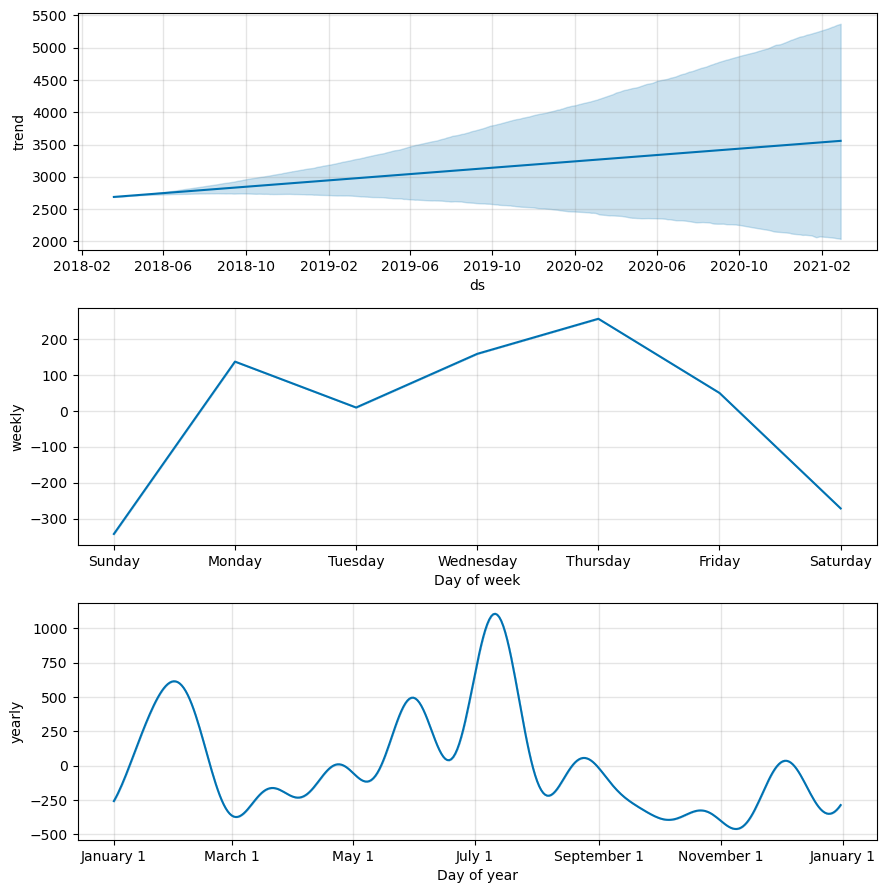

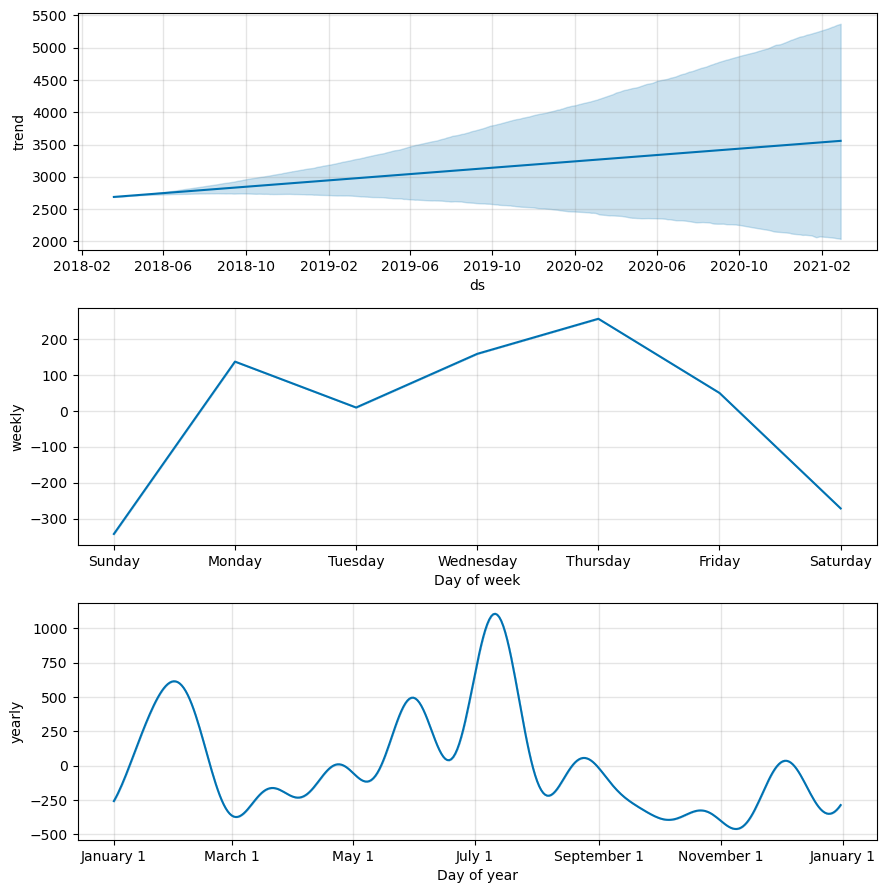

In [31]:
model.plot_components(forecast)

In [32]:
print("From the yearly plot the month with the highest seasonality value is July")

From the yearly plot the month with the highest seasonality value is July


# QUESTION 17

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [33]:
dfd.reset_index(inplace=True)
train=dfd.iloc[:2757]
test=dfd.iloc[2757:]
train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)

In [34]:
model=Prophet()
model.add_regressor("add1")
model.add_regressor("add2")
model.add_regressor("add3")
model.fit(train)

14:10:32 - cmdstanpy - INFO - Chain [1] start processing
14:10:33 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
X_test =  test.drop('y', axis=1)
y_test = test['y']
forecast=model.predict(X_test)
pred=forecast['yhat']
forecast[['ds', 'yhat', 'yhat_upper', 'yhat_lower', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_upper,yhat_lower,trend,trend_lower,trend_upper
0,2018-03-20,1985.213319,4066.277291,-267.927282,1864.237392,1864.237392,1864.237392
1,2018-03-21,1976.634587,4095.990569,-186.563711,1864.922590,1864.922590,1864.922590
2,2018-03-22,2896.707960,4951.370281,356.003650,1865.607788,1865.607788,1865.607788
3,2018-03-23,2580.848717,4681.311371,305.372191,1866.292986,1866.292986,1866.292986
4,2018-03-24,1433.831991,3579.006187,-623.895203,1866.978184,1866.978184,1866.978184
...,...,...,...,...,...,...,...
1072,2021-02-24,951.161394,3134.043929,-1390.531610,2598.769516,1844.333074,3315.486836
1073,2021-02-25,1310.670944,3499.163963,-1046.846811,2599.454713,1843.828550,3317.312928
1074,2021-02-26,1374.454239,3616.772420,-887.049712,2600.139911,1843.452392,3319.139021
1075,2021-02-27,1029.410352,3359.798099,-1070.469664,2600.825109,1843.576916,3320.965113


In [39]:
MAPE=mean_absolute_percentage_error(y_test, pred)*100
print("Prophet Model MAPE score on validation set is : {:.2f}".format(RMSE))

Prophet Model MAPE score on validation set is : 3214.12


# Question 18

In [40]:
RMSE=mean_squared_error(y_test, pred, squared=False)
print("Prophet Model RMSE score on validation set is : {:.2f}".format(RMSE))

Prophet Model RMSE score on validation set is : 2706.71


# Question 19

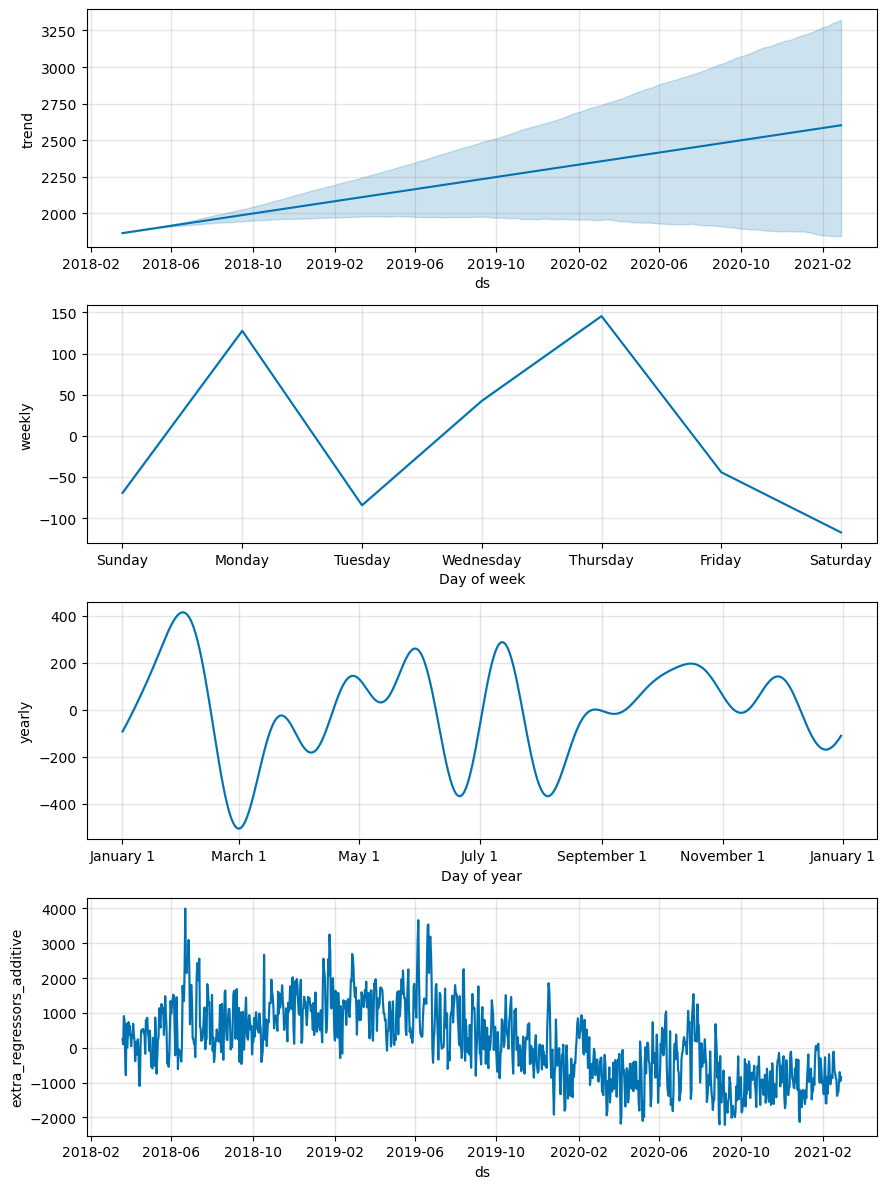

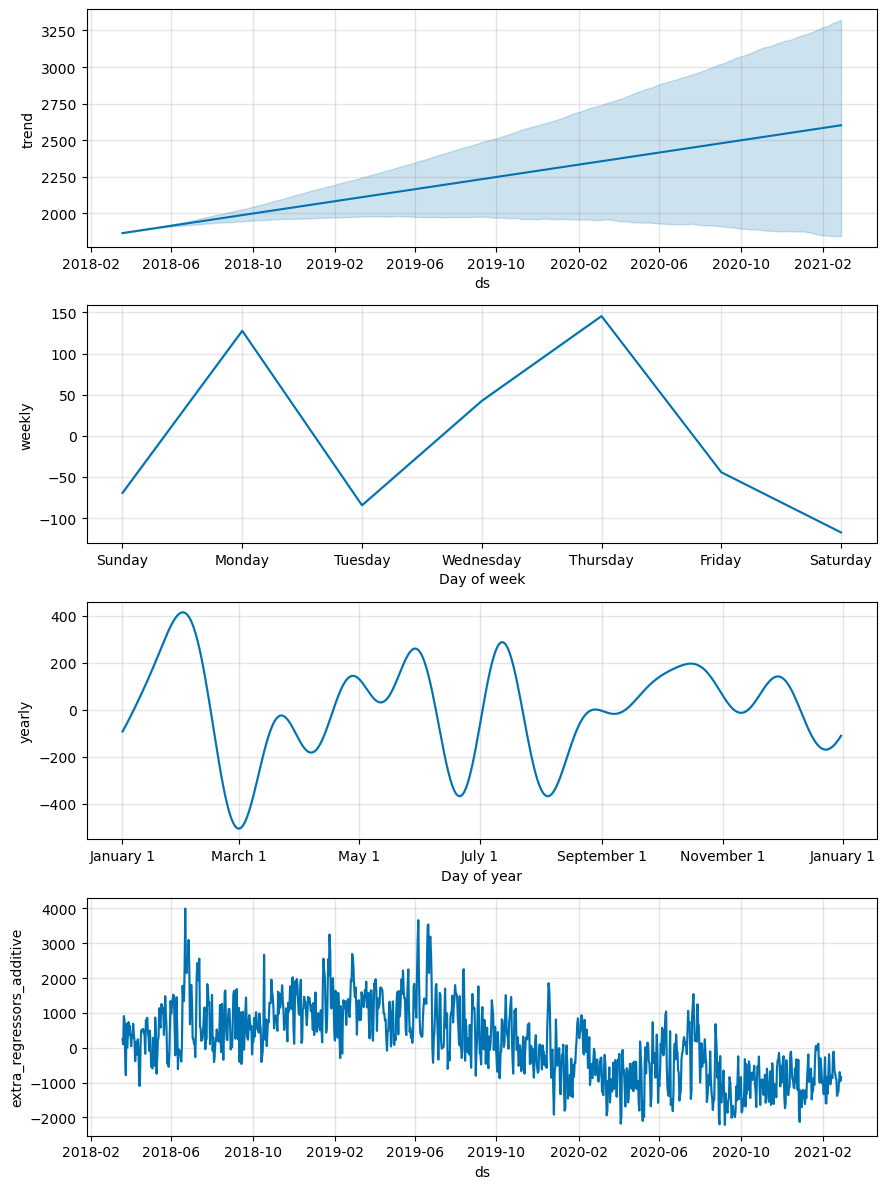

In [45]:
model.plot_components(forecast)


In [46]:
print('The day of daily seasonality that has the highest value is Thursday')

The day of daily seasonality that has the highest value is Thursday


# Question 20

In [49]:
dfd.head()

,index,ds,add2,add1,add3,y
0,0,2010-09-01,379.2,41565.380,88.56,2751.700
1,1,2010-09-02,369.6,38898.990,88.56,570.810
2,2,2010-09-03,439.2,41665.760,106.80,504.975
3,3,2010-09-04,328.8,35638.085,81.36,502.275
4,4,2010-09-05,357.6,35611.410,106.80,500.555


In [51]:
dfd = dfd.drop('add2', axis=1)

In [54]:
train=dfd.iloc[:2757]
y_test=dfd.iloc[2757:]
train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)

In [55]:
X_test =  test.drop('y', axis=1)
y_test = test['y']
forecast=model.predict(X_test)
pred=forecast['yhat']
forecast[['ds', 'yhat', 'yhat_upper', 'yhat_lower', 'trend', 'trend_lower', 'trend_upper']]

ValueError: Regressor 'add2' missing from dataframe